In [67]:
import torch
import sklearn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [68]:
train_data = datasets.FashionMNIST(
    root="FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="FashionMNIST",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [69]:
 len(train_data), len(test_data)

(60000, 10000)

In [70]:
image, label = train_data[0]
label, image
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [23]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [71]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

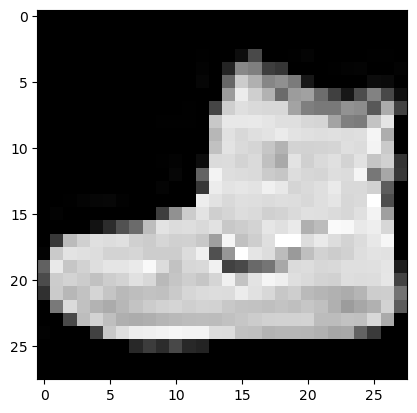

In [30]:
import matplotlib.pyplot as plt

image, label = train_data[0]

plt.imshow(image.squeeze(), cmap="gray")

In [72]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: FashionMNIST
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: FashionMNIST
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [41]:
from torch.utils.data import DataLoader

BTACH_SIZE = 32

train_data_loader = DataLoader(dataset=train_data, batch_size=BTACH_SIZE, shuffle=True)

test_data_loader = DataLoader(dataset=test_data, batch_size=BTACH_SIZE, shuffle=False)

In [100]:
# Build a model
import torch
from torch import nn
import numpy as np


flatten_model = nn.Flatten()

class MultiClassModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.layer_stack(x)
    
    
def normalizePredictions(y_pred):
    vals = torch.softmax(y_pred, dim=1)
    return torch.argmax(vals, dim=1)

In [101]:
model_0 = MultiClassModelV0(
          input_features=28*28,
          hidden_units=10,
          output_features=10,
          )

model_0

MultiClassModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [102]:
model_0.eval()
torch.manual_seed(45)

dynmmy_x = torch.rand([1, 1, 28, 28]) # 1 -> one image data, 1 -> no of color channel, 28, 28 -> image matrix

with torch.inference_mode():
    y_pred = model_0(dynmmy_x)
    y_pred_normalized = normalizePredictions(y_pred)

y_pred_normalized

tensor([0])

In [112]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss() # is combines BCE with sigmoid

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [116]:
from helpers import calculate_accuracy

torch.manual_seed(42)

epochs = 50

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    train_loss = 0;
    
    print(f"Epoch: {epoch}\n----------")
    
    train_epochs.append(epoch)
    
    for batch, (X, Y) in enumerate(train_data_loader):
        
        model_0.train();
        
        y_logits_train = model_0(X)
        
        loss = loss_fn(y_logits_train, Y)
        
        train_loss+=loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        model_0.eval()
        
        # if batch % 400 == 0:
            # print(f"batch : {batch}")
            
    # Average train_loss        
    train_loss /= len(train_data_loader)
    
    train_loss_arr.append(train_loss.item())
    
    print(f"Train loss for {epoch} : {train_loss}")
    
    ### Testing
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, Y_test in test_data_loader:
            
            y_logits_test = model_0(X_test)
        
            test_loss = loss_fn(y_logits_test, Y_test)
            
            test_loss+=test_loss
            
            y_pred_test = normalizePredictions(y_logits_test)
            
            test_acc+=calculate_accuracy(Y_test ,y_pred_test)
            
        test_loss/=len(test_data_loader)
        test_acc/=len(test_data_loader)
        
        test_loss_arr.append(test_loss.item())
        
        print(f"Test loss for {epoch}: {test_loss}, Test acc: {test_acc}")
    
    

Epoch: 0
----------
Train loss for 0 : 0.29538631439208984
Test loss for 0: 0.002296481980010867, Test acc: 85.8226837060703
Epoch: 1
----------
Train loss for 1 : 0.29497677087783813
Test loss for 1: 0.0020751915872097015, Test acc: 86.13218849840256
Epoch: 2
----------
Train loss for 2 : 0.29486319422721863
Test loss for 2: 0.0021363114938139915, Test acc: 86.10223642172524
Epoch: 3
----------
Train loss for 3 : 0.2945376932621002
Test loss for 3: 0.0020874403417110443, Test acc: 85.81269968051119
Epoch: 4
----------
Train loss for 4 : 0.2947324514389038
Test loss for 4: 0.0022859759628772736, Test acc: 86.00239616613419
Epoch: 5
----------
Train loss for 5 : 0.2942523658275604
Test loss for 5: 0.0021410579793155193, Test acc: 86.0223642172524
Epoch: 6
----------
Train loss for 6 : 0.29408395290374756
Test loss for 6: 0.002315505873411894, Test acc: 86.09225239616613
Epoch: 7
----------
Train loss for 7 : 0.2940905690193176
Test loss for 7: 0.002078335965052247, Test acc: 85.96246006

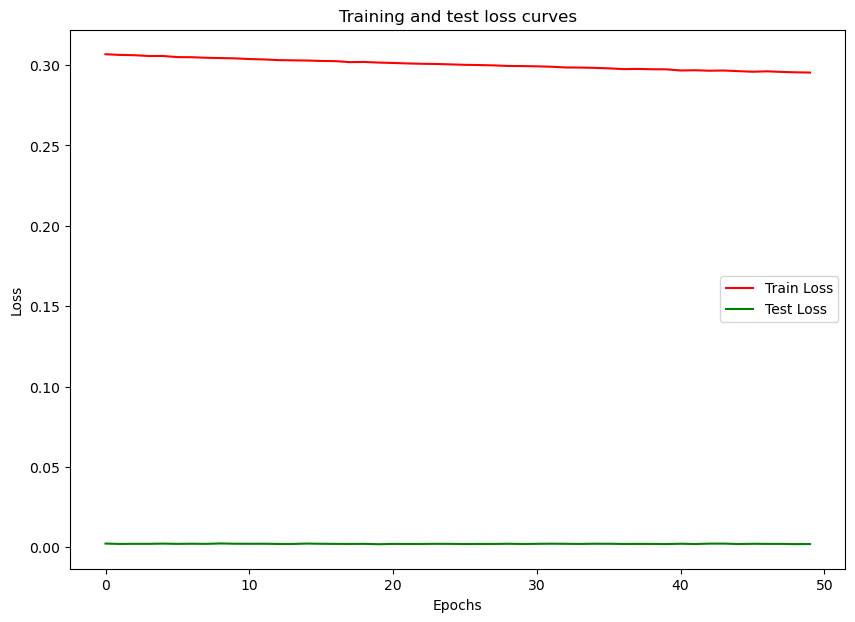

In [115]:
from helpers import plot_train_graph, plot_decision_boundary

plot_train_graph(x=train_epochs, y_train=train_loss_arr, y_test=test_loss_arr)